# Задачи классификации и кластеризации

Булыгин Олег:  
* [LinkedIn](linkedin.com/in/obulygin)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
wine = load_wine()

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [ ]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [ ]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, random_state=42)

In [ ]:
len(y_test)

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [ ]:
result

,0,1
0,0,0
1,0,0
2,2,2
3,0,0
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,2,2


Почитать про другие метрики качества в задачах классификации: https://habr.com/ru/company/ods/blog/328372/

In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [ ]:
import sklearn

help(sklearn.metrics)

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 2.77785654e+00, -2.62823777e-01,  6.34033699e+00,
        -9.23264800e-01,  1.12148061e-03, -1.73622434e+00,
         4.95743646e+00,  3.14554165e+00, -1.19253447e+00,
        -8.98034416e-01, -1.73258088e-01,  3.81064150e+00,
         1.36856107e-02],
       [-2.00764892e+00, -4.89578703e-01, -6.54854947e+00,
         4.49722072e-01,  4.06933168e-05, -7.56394603e-01,
         1.34633325e+00,  2.67670321e+00,  1.06737575e+00,
        -6.98689535e-01,  3.51943073e+00,  4.92874648e-01,
        -5.99014310e-03],
       [-4.39452636e-01,  1.04199771e+00,  1.89161928e+00,
         4.66343927e-01, -1.43060813e-03,  3.23563291e+00,
        -8.04119074e+00, -7.78525286e+00, -1.13872164e-01,
         2.12622388e+00, -4.96962424e+00, -5.38307173e+00,
        -7.90803569e-03]])

In [ ]:
# визуализируем дискриминантные линии только по 2 признакам
small_train = X_train[['ash', 'flavanoids']]
small_test = X_test[['ash', 'flavanoids']]

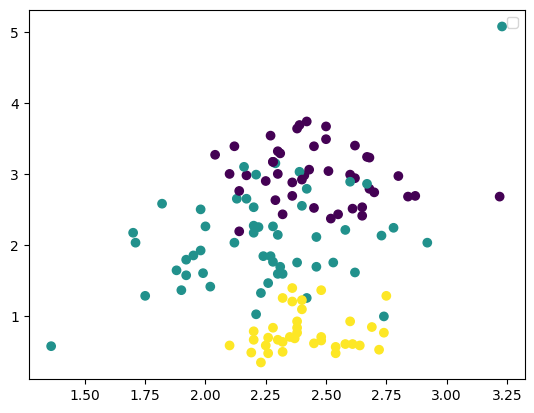

In [ ]:
plt.scatter(x=small_train['ash'], y=small_train['flavanoids'], c=y_train)
plt.legend()
plt.show()


In [ ]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.45795455, 2.98522727],
       [2.24735849, 2.07150943],
       [2.41416667, 0.76888889]])

In [ ]:
y_train

array([0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0,
       2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1,
       1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2,
       1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0,
       2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1,
       1])

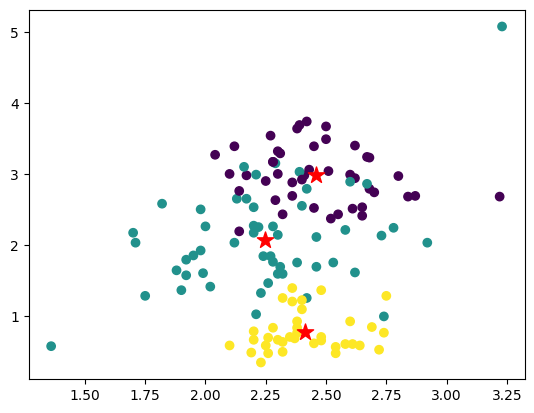

In [ ]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=y_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')


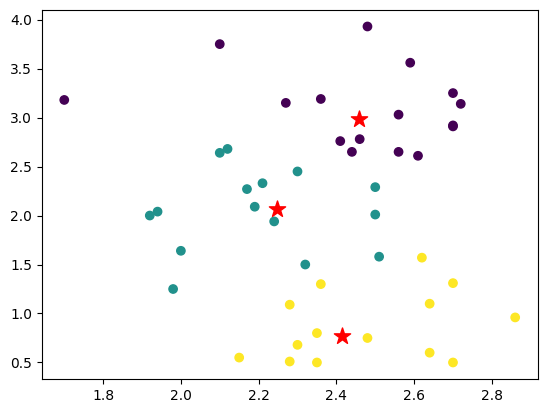

In [ ]:
# визуализация разделения на тесте
plt.scatter(small_test['ash'], small_test['flavanoids'], c=lda_small.predict(small_test))
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

In [ ]:
# второй признак во много раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[-0.35930524,  3.52752381],
       [-1.82165655,  0.40785359],
       [ 3.1210341 , -4.9118691 ]])

In [ ]:
# какая будет точность?
accuracy_score(y_test, lda_small.predict(small_test))

0.8

In [ ]:
data[['flavanoids', 'ash']].corr()

,flavanoids,ash
flavanoids,1.000000,0.115077
ash,0.115077,1.000000


In [ ]:
# заменим модель на логистическую регрессиию
# кому интересно, отличия логистической регрессии от LDA:
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [ ]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(X_test)

array([[9.73067203e-01, 1.30618394e-02, 1.38709577e-02],
       [9.88784150e-01, 1.42686917e-03, 9.78898124e-03],
       [4.84491458e-02, 2.30996350e-01, 7.20554504e-01],
       [9.96850907e-01, 1.24762390e-03, 1.90146941e-03],
       [6.37663483e-02, 9.07851033e-01, 2.83826184e-02],
       [9.94127474e-01, 3.39607679e-04, 5.53291791e-03],
       [1.40142983e-02, 9.85599014e-01, 3.86687685e-04],
       [5.42638129e-03, 3.17422922e-04, 9.94256196e-01],
       [4.43832047e-02, 9.55353350e-01, 2.63445592e-04],
       [1.54139186e-01, 1.44733104e-02, 8.31387503e-01],
       [4.85179105e-01, 5.12883085e-01, 1.93781048e-03],
       [1.13324555e-04, 2.21974796e-04, 9.99664701e-01],
       [9.92550072e-01, 3.63470078e-03, 3.81522680e-03],
       [6.17146023e-02, 8.01472495e-01, 1.36812903e-01],
       [9.93260767e-01, 1.14165281e-05, 6.72781652e-03],
       [2.88609367e-04, 9.99626376e-01, 8.50151014e-05],
       [1.75622046e-03, 9.97068558e-01, 1.17522175e-03],
       [2.90945963e-03, 9.96773

In [ ]:
res = lr.predict_proba(X_test)
sum(res[0])

1.0

In [ ]:
accuracy_score(y_test, lr.predict(X_test))

0.9777777777777777

In [ ]:
lr.coef_

array([[ 9.30887614e-04,  1.68583766e-01,  1.29250735e-01,
        -2.50138694e-01, -2.52902076e-02,  1.96627900e-01,
         4.02185949e-01, -8.90741392e-03,  4.83941705e-02,
         2.10312085e-02, -3.95097306e-03,  2.43174764e-01,
         7.10143352e-03],
       [ 2.30359820e-01, -5.08681510e-01, -1.38185066e-01,
         2.40687838e-01,  1.08032180e-02,  1.61483020e-01,
         3.03340380e-01,  8.41679283e-03,  2.80627161e-01,
        -1.09362358e+00,  1.88909992e-01,  3.79263989e-01,
        -6.31940925e-03],
       [-2.31290708e-01,  3.40097744e-01,  8.93433072e-03,
         9.45085606e-03,  1.44869896e-02, -3.58110920e-01,
        -7.05526328e-01,  4.90621087e-04, -3.29021332e-01,
         1.07259237e+00, -1.84959018e-01, -6.22438753e-01,
        -7.82024268e-04]])

## Кластеризация

In [ ]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_blobs

In [ ]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)
X

array([[-1.10614279e+00,  8.93228430e+00],
       [ 1.55455249e+00,  4.67332157e+00],
       [-9.50670073e-01,  9.69561393e+00],
       [ 3.97742842e+00,  1.02186869e+01],
       [-2.63106432e+00,  1.03190859e+00],
       [-3.33569682e-01,  1.02931528e+01],
       [ 4.12599779e+00,  1.37988255e+00],
       [ 3.92218438e+00,  7.54489330e+00],
       [ 2.87056506e-02,  5.17552943e+00],
       [ 1.59266361e-01,  1.05540623e+01],
       [ 1.51890196e+00,  1.30938316e+01],
       [-6.53900658e-01,  7.44233728e+00],
       [-2.34341825e+00,  6.58673706e+00],
       [-4.03568188e-01,  8.82386973e+00],
       [ 1.74607243e+00,  1.12265137e+01],
       [ 5.84879473e-01,  1.23803641e+01],
       [ 2.19989135e+00,  8.04170212e+00],
       [-3.62443680e+00,  5.79026112e+00],
       [-2.50322913e+00,  7.74308550e+00],
       [-6.08221967e-01,  9.97443980e+00],
       [-4.09216240e+00,  6.79479208e+00],
       [ 1.39364531e+00,  1.15638402e+01],
       [ 1.23275510e+00,  5.86388593e+00],
       [ 7.

In [ ]:
help(make_blobs)

<ipython-input-40-b0b20f45da65>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=X[:, 0], y=X[:, 1], cmap='autumn', s=60)


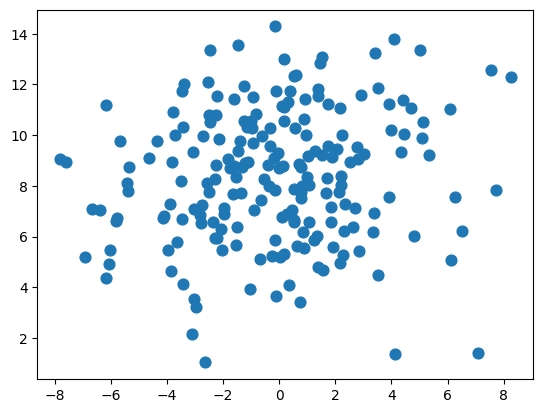

In [ ]:
plt.scatter(x=X[:, 0], y=X[:, 1], cmap='autumn', s=60)

In [ ]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [ ]:
v_1 = np.array(np.random.randint(0, 1000, 500))
v_2 = np.array(np.random.randint(0, 10, 500))

In [ ]:
print(v_1.max())
print(v_1.min())

print(v_2.max())
print(v_2.min())

997
1
9
0


In [ ]:
v_1_scaled = scaler.fit_transform(v_1.reshape(-1, 1))
v_1_scaled
v_2_scaled = scaler.fit_transform(v_2.reshape(-1, 1))
v_2_scaled

array([[ 0.20043628],
       [-1.52152488],
       [-0.48834818],
       [-1.52152488],
       [-1.17713265],
       [-0.14395595],
       [-1.52152488],
       [ 1.23361297],
       [ 1.23361297],
       [ 1.23361297],
       [ 0.54482851],
       [ 0.20043628],
       [ 0.54482851],
       [-0.48834818],
       [ 0.54482851],
       [-1.17713265],
       [ 0.20043628],
       [ 1.57800521],
       [ 0.20043628],
       [-0.83274042],
       [ 0.54482851],
       [-0.83274042],
       [ 0.20043628],
       [-0.83274042],
       [-0.14395595],
       [ 1.23361297],
       [ 1.57800521],
       [-0.48834818],
       [-0.48834818],
       [-1.52152488],
       [-0.83274042],
       [ 1.23361297],
       [-0.14395595],
       [-1.17713265],
       [-1.17713265],
       [ 0.20043628],
       [ 0.88922074],
       [-0.83274042],
       [ 0.20043628],
       [-1.52152488],
       [ 0.88922074],
       [ 0.20043628],
       [-0.83274042],
       [ 0.54482851],
       [ 1.23361297],
       [-0

In [ ]:
print(v_1_scaled.max())
print(v_1_scaled.min())

print(v_2_scaled.max())
print(v_2_scaled.min())

1.6263739503130383
-1.7228559837137374
1.5780052062095575
-1.5215248801907084


In [ ]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-2.94111482e-01,  2.17894403e-01],
       [ 5.54720818e-01, -1.41142815e+00],
       [-2.44511565e-01,  5.09916256e-01],
       [ 1.32768244e+00,  7.10024724e-01],
       [-7.80601858e-01, -2.80449887e+00],
       [-4.76401880e-02,  7.38512664e-01],
       [ 1.37508001e+00, -2.67137683e+00],
       [ 1.31005813e+00, -3.12870385e-01],
       [ 6.79352425e-02, -1.21930189e+00],
       [ 1.09587569e-01,  8.38327057e-01],
       [ 5.43347352e-01,  1.80994941e+00],
       [-1.49834258e-01, -3.52104545e-01],
       [-6.88835139e-01, -6.79425732e-01],
       [-6.99715664e-02,  1.76418973e-01],
       [ 6.15820752e-01,  1.09558220e+00],
       [ 2.45369429e-01,  1.53700295e+00],
       [ 7.60601012e-01, -1.22809596e-01],
       [-1.09751400e+00, -9.84128143e-01],
       [-7.39819044e-01, -2.37049334e-01],
       [-1.35261545e-01,  6.16584782e-01],
       [-1.24673086e+00, -5.99831531e-01],
       [ 5.03387161e-01,  1.22463094e+00],
       [ 4.52058922e-01, -9.55961999e-01],
       [ 3.

<ipython-input-44-2db0c5f3ae5e>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)


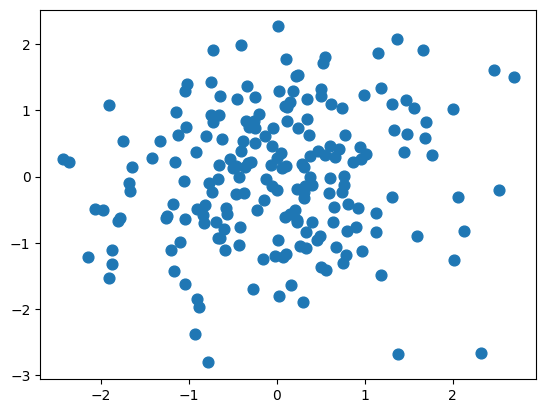

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1,
       2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0,
       0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1,
       2, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2,
       0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2,
       2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0,
       2, 1], dtype=int32)

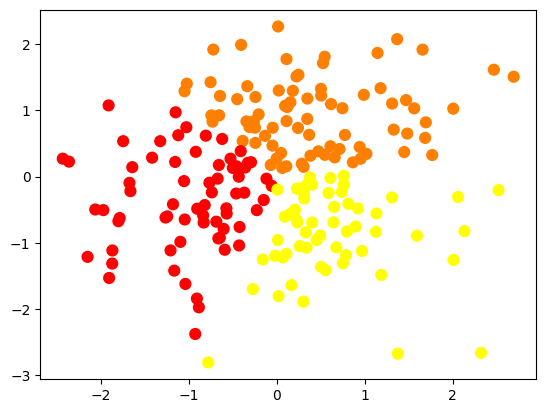

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [ ]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Инерция')

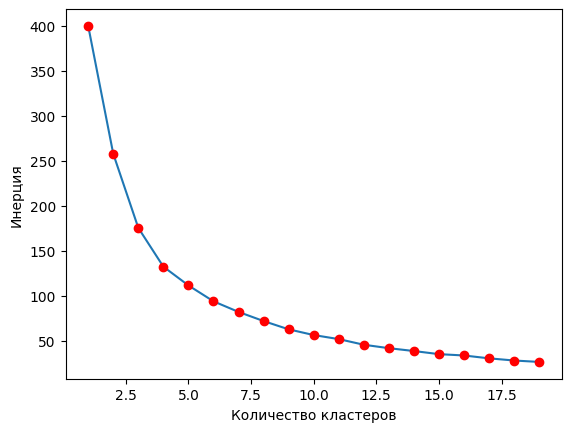

In [ ]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')

Иерархическая кластеризация

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

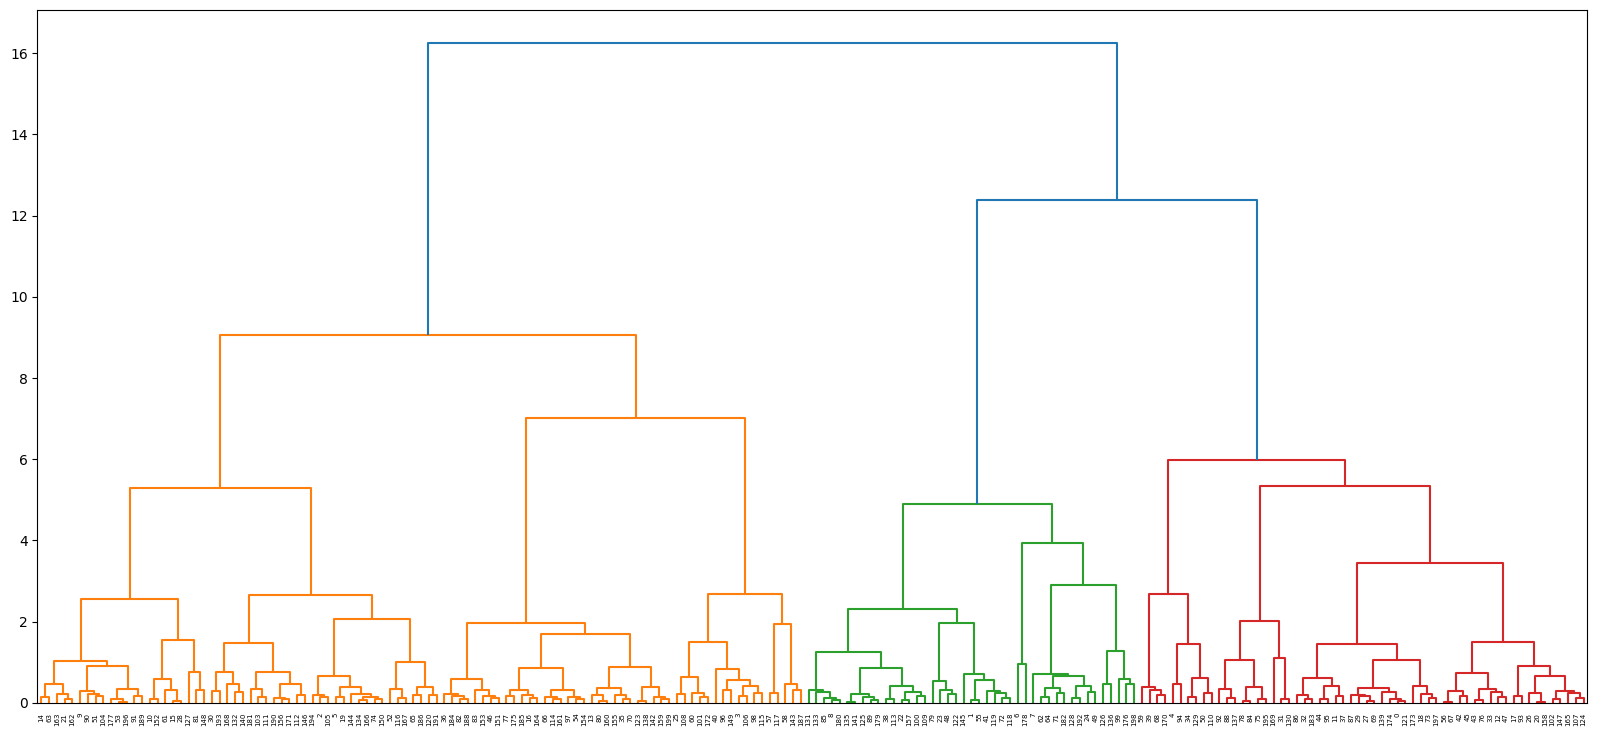

In [ ]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [ ]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [ ]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([1, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0,
       0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1,
       1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2,
       1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2,
       0, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1,
       2, 0])

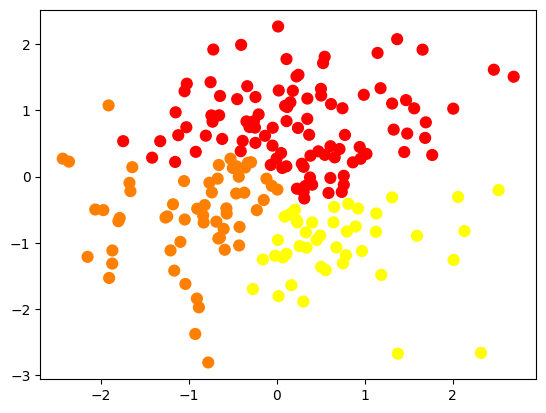

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [ ]:
df = pd.DataFrame(X)
df['y_hat'] = clusters
df

,0,1,y_hat
0,-1.106143,8.932284,1
1,1.554552,4.673322,2
2,-0.950670,9.695614,0
3,3.977428,10.218687,0
4,-2.631064,1.031909,1
...,...,...,...
195,-6.657805,7.067292,1
196,0.108629,11.157497,0
197,-2.589261,8.123075,1
198,6.113062,5.078582,2
